# Proyecto: Análisis de precios y volúmen de ventas de Aguacate en USA

**Propósito y detalles del proyecto:**

En este proyecto se analizará la información obtendida del Dataset de Kaggle "Avocado Prices (2020)", se plantearán preguntas a resolver, se obtendran hallazgos conforme al análisis y visualización efectiva de los datos y se implementará un modelo de predicción para predecir el precio del aguacate en USA. Para esto se utilizaran los datos de los años 2015 a 2020 de las diferentes regiones del país.

**El trabajo se organiza en tres partes:**
* I.  EDA & Visualización efectiva de datos.  
* II. Modelado de Datos.

## I. EDA & Visualización efectiva de datos.

### 1. Carga de librerias

In [1]:
#Importar las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import altair as alt
import seaborn as sns

### 2. Carga de datos

In [2]:
#Carga de dataset
data = pd.read_csv('avocado-2020.csv', sep =',')

In [3]:
#Visualización de las primeras líneas de datos que contiene el archivo
data.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


### 3. Exploración de datos

In [4]:
#Ver el tamaño del dataset
data.shape

(33045, 13)

In [5]:
# Primer acercamiento  a los datos tipos de dato
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33045 entries, 0 to 33044
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           33045 non-null  object 
 1   average_price  33045 non-null  float64
 2   total_volume   33045 non-null  float64
 3   4046           33045 non-null  float64
 4   4225           33045 non-null  float64
 5   4770           33045 non-null  float64
 6   total_bags     33045 non-null  float64
 7   small_bags     33045 non-null  float64
 8   large_bags     33045 non-null  float64
 9   xlarge_bags    33045 non-null  float64
 10  type           33045 non-null  object 
 11  year           33045 non-null  int64  
 12  geography      33045 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 3.3+ MB


In [6]:
#Búsqueda de valores nulos
data.isnull().sum()

date             0
average_price    0
total_volume     0
4046             0
4225             0
4770             0
total_bags       0
small_bags       0
large_bags       0
xlarge_bags      0
type             0
year             0
geography        0
dtype: int64

In [7]:
#Busqueda de valores duplicados
data.duplicated().sum()

0

In [8]:
#Ver los datos unicos de la columna año
print(data['year'].unique())

[2015 2016 2017 2018 2019 2020]


In [9]:
#El archivo contiene dos tipos de producto Convencional y Orgánico
print(data['type'].unique())

['conventional' 'organic']


In [10]:
#Ver todas las ubicaciones que contiene el archivo
print(data['geography'].unique())

['Albany' 'Atlanta' 'Baltimore/Washington' 'Boise' 'Boston'
 'Buffalo/Rochester' 'California' 'Charlotte' 'Chicago'
 'Cincinnati/Dayton' 'Columbus' 'Dallas/Ft. Worth' 'Denver' 'Detroit'
 'Grand Rapids' 'Great Lakes' 'Harrisburg/Scranton' 'Hartford/Springfield'
 'Houston' 'Indianapolis' 'Jacksonville' 'Las Vegas' 'Los Angeles'
 'Louisville' 'Miami/Ft. Lauderdale' 'Midsouth' 'Nashville'
 'New Orleans/Mobile' 'New York' 'Northeast' 'Northern New England'
 'Orlando' 'Philadelphia' 'Phoenix/Tucson' 'Pittsburgh' 'Plains'
 'Portland' 'Raleigh/Greensboro' 'Richmond/Norfolk' 'Roanoke' 'Sacramento'
 'San Diego' 'San Francisco' 'Seattle' 'South Carolina' 'South Central'
 'Southeast' 'Spokane' 'St. Louis' 'Syracuse' 'Tampa' 'Total U.S.' 'West'
 'West Tex/New Mexico']


In [11]:
#Ver todas la cantidad de ubicaciones diferentes que contiene el archivo
data['geography'].nunique()

54

Comprobamos que en la columna año se encuentran únicamente los años de 2015 a 2020, en la columna de tipo de aguacate observamos dos variantes: convencional u orgánico. Mientras que la columna de ubicación contiene en total 52 valores únicos.

Podemos observar que en la columna de ubicación (geography) contiene información de los estados de USA y además un resumen por región que contiene los subtotales: total us, west, midsouth, northeast, south central y southeast. Por lo cual se realizará la separación de estos datos, tendremos dos conjuntos de datos, uno por estados y otro por regiones para realizar nuestras visualizaciones.

In [12]:
#Se obtiene la lista de regiones a excluir
regiones = ['West','Midsouth', 'Southeast','South Central','Northeast']

#Se realiza el filtro del dataset por regiones

df_regiones = data[np.isin(data['geography'], regiones)]
df_estados = data[np.isin(data['geography'], regiones, invert=True)]

#Se elimina también la columna "total U.S"
df_estados = df_estados.loc[df_estados['geography'] != 'Total U.S.']

In [13]:
#Ver los valores únicos del conjunto de datos por region 
print(df_regiones['geography'].unique())

['Midsouth' 'Northeast' 'South Central' 'Southeast' 'West']


In [14]:
#Ver los valores únicos del conjunto de datos por estado 
print(df_estados['geography'].unique())

['Albany' 'Atlanta' 'Baltimore/Washington' 'Boise' 'Boston'
 'Buffalo/Rochester' 'California' 'Charlotte' 'Chicago'
 'Cincinnati/Dayton' 'Columbus' 'Dallas/Ft. Worth' 'Denver' 'Detroit'
 'Grand Rapids' 'Great Lakes' 'Harrisburg/Scranton' 'Hartford/Springfield'
 'Houston' 'Indianapolis' 'Jacksonville' 'Las Vegas' 'Los Angeles'
 'Louisville' 'Miami/Ft. Lauderdale' 'Nashville' 'New Orleans/Mobile'
 'New York' 'Northern New England' 'Orlando' 'Philadelphia'
 'Phoenix/Tucson' 'Pittsburgh' 'Plains' 'Portland' 'Raleigh/Greensboro'
 'Richmond/Norfolk' 'Roanoke' 'Sacramento' 'San Diego' 'San Francisco'
 'Seattle' 'South Carolina' 'Spokane' 'St. Louis' 'Syracuse' 'Tampa'
 'West Tex/New Mexico']


In [15]:
#Ver el tamaño del conjunto de datos por región
df_regiones.shape

(3060, 13)

In [16]:
#Ver el tamaño del conjunto de datos por estados
df_estados.shape

(29373, 13)

In [17]:
df_estados['geography'].nunique()

48

El tamaño del conjunto de datos por estados es de 29,373 filas y 13 columnas, mientras que los datos por regiones es de 3,060 filas por 13 columnas, obteniendo 48 ubicaciones diferentes. 

### 4. Plantear preguntas a resolver

* ¿Existe una tendencia a la alza o baja en el precio de los aguacates a lo largo de los años?
* ¿Qué factores podrían influir en la alza o baja de precios de aguacates?
* ¿Durante qué periodo se vende la mayor cantidad de aguacates?
* ¿En qué región y/o estado se vende la mayor cantidad de aguacates?
* ¿El tipo de aguacate (convencional / orgánico) juega un papel importante en el precio o volúmen de venta del aguacate? 


### 5. Visualizaciones con Altair

In [18]:
#crear un dataset agrupado por Tipo y Año

df_año = df_estados.groupby(['year']).agg(
                                            total_volume=('total_volume','sum'),       
                                            average_price=('average_price','mean')).reset_index()

In [19]:
df_año.head()

,year,total_volume,average_price
0,2015,1.629392e+09,1.382603
1,2016,1.781742e+09,1.345453
2,2017,1.812197e+09,1.522934
3,2018,1.989538e+09,1.359938
4,2019,2.098001e+09,1.405994


In [20]:
#Grafica de barras
barras_vol = alt.Chart(df_año).mark_bar().encode(
  x=alt.X('year:N',title=" ", axis=alt.Axis(labelAngle=0, labelFontSize=12,)),
  y=alt.Y('total_volume:Q', title="Volumen de ventas", axis=alt.Axis(format=".2s", labelFontSize=16))
)

In [21]:
barras_vol

alt.Chart(...)

In [22]:
#Etiquetas para la gráfica de barras
etiquetas_vol=barras_vol.mark_text(dy=-5).encode(
text =alt.Text('total_volume:Q', format = ".2s"),
)

In [23]:
etiquetas_vol

alt.Chart(...)

In [24]:
barras_vol_final = barras_vol + etiquetas_vol
barras_vol_final

alt.LayerChart(...)

In [25]:
barras_vol_final.properties(
  title="Volúmen de ventas por año",
  width=500,
).configure_title(
    fontSize=18,
    font='Arial',
    anchor='middle',
).configure_axis(
 labelFontSize=14,
 titleFontSize=14
).configure_mark(
 opacity=0.7,
 color='#064635'
)

alt.LayerChart(...)

In [26]:
barras_precio = alt.Chart(df_año).mark_bar().encode(
  x=alt.X('year:O',title="", axis=alt.Axis(labelAngle=0, labelFontSize=12)),
  y=alt.Y('average_price:Q', title="Precio promedio", axis=alt.Axis(format=".2s", labelFontSize=16))
)

In [27]:
barras_precio

alt.Chart(...)

In [28]:
etiquetas_precio=barras_precio.mark_text(dy=-5).encode(
text =alt.Text('average_price:Q', format = ".2s"),
)

In [29]:
etiquetas_precio

alt.Chart(...)

In [30]:
barras_precio_final = barras_precio + etiquetas_precio

In [31]:
barras_precio_final.properties(
  title="Precio promedio por año",
  width=500,
).configure_title(
    fontSize=18,
    font='Arial',
    anchor='middle',
).configure_axis(
 labelFontSize=14,
 titleFontSize=14
).configure_mark(
 opacity=0.7,
 color='#064635'
)

alt.LayerChart(...)

In [32]:
df_tipo = df_estados.groupby(['year','type']).agg(
                                            total_volume=('total_volume','sum'),       
                                            average_price=('average_price','mean')).reset_index()

In [33]:
df_tipo

,year,type,total_volume,average_price
0,2015,conventional,1.595909e+09,1.083890
1,2015,organic,3.348380e+07,1.681435
2,2016,conventional,1.731357e+09,1.110517
3,2016,organic,5.038493e+07,1.580389
4,2017,conventional,1.749232e+09,1.301836
5,2017,organic,6.296458e+07,1.744205
6,2018,conventional,1.913558e+09,1.147929
7,2018,organic,7.598019e+07,1.571947
8,2019,conventional,2.020272e+09,1.193702
9,2019,organic,7.772917e+07,1.618285


In [34]:
alt.Chart(df_tipo).mark_bar().encode(
    x='average_price:Q',
    y='type:N',
    color='type:N',
    row='year:N',
    tooltip='sum(average_price):Q',
).properties(
  title="Precio promedio anual por Tipo",
  width=500,
).configure_title(
    fontSize=18,
    font='Arial',
    anchor='middle',
).configure_axis(
 labelFontSize=11,
 titleFontSize=0
)

alt.Chart(...)

In [35]:
#crear un dataset agrupado por ubicación 
df_ubicacion_estado = df_estados.groupby(['geography']).agg(
                                            total_volume=('total_volume','sum'),      
                                            average_price=('average_price','mean')).reset_index()

In [36]:
df_ubicacion_estado.head()

,geography,total_volume,average_price
0,Albany,3.481634e+07,1.491748
1,Atlanta,1.989941e+08,1.303301
2,Baltimore/Washington,2.767646e+08,1.474820
3,Boise,3.035955e+07,1.437239
4,Boston,2.041325e+08,1.536307


In [37]:
#Creamos un gráfico de columen de ventas por estado
grafico_estado = alt.Chart(df_ubicacion_estado).mark_bar().encode(
    x='sum(total_volume):Q',
    y=alt.Y('geography:N', sort='-x'),
    color=alt.Color('sum(total_volume):Q', scale=alt.Scale(scheme="goldgreen")),
)

.properties(
  title="Volúmen de ventas por estado",
  width=500,
).configure_title(
    fontSize=18,
    anchor="start",
)

In [38]:
#crear un dataset agrupado por ubicación y tipo
df_ubicacion_regiones = df_regiones.groupby(['geography']).agg(
                                            total_volume=('total_volume','sum'),      
                                            average_price=('average_price','mean')).reset_index()

In [39]:
df_ubicacion_regiones.head()

,geography,total_volume,average_price
0,Midsouth,1.097477e+09,1.373072
1,Northeast,1.541420e+09,1.538873
2,South Central,2.075908e+09,1.105310
3,Southeast,1.381324e+09,1.326683
4,West,2.150049e+09,1.323448


In [40]:
#Creamos un gráfico de columen de ventas por region
grafico_region = alt.Chart(df_ubicacion_regiones).mark_bar().encode(
    x='sum(total_volume):Q',
    y=alt.Y('geography:N', sort='-x'),
    color=alt.Color('sum(total_volume):Q', scale=alt.Scale(scheme="goldgreen")),
)

In [41]:
(grafico_region & grafico_estado).resolve_scale(x='shared')

alt.VConcatChart(...)

In [42]:
grafico_estado_precio = alt.Chart(df_ubicacion_estado).mark_bar().encode(
    x='sum(average_price):Q',
    y=alt.Y('geography:N', sort='-x'),
    color=alt.Color('sum(average_price):Q', scale=alt.Scale(scheme="goldgreen")),
)

In [43]:
grafico_region_precio = alt.Chart(df_ubicacion_regiones).mark_bar().encode(
    x='sum(average_price):Q',
    y=alt.Y('geography:N', sort='-x'),
    color=alt.Color('sum(average_price):Q', scale=alt.Scale(scheme="goldgreen")),
)

In [44]:
(grafico_region_precio  & grafico_estado_precio).resolve_scale(x='shared') 

alt.VConcatChart(...)

In [45]:
#Creación de un gráfico de precio vs volúmen
alt.Chart(df_regiones).mark_point().encode(
    x='total_volume:Q',
    y='average_price:Q',
    color='geography:N',
    tooltip=['total_volume:Q', 'average_price:Q', 'type:N']
).properties(
  title="Volúmen vs Precio",
  width=2000,
).configure_title(
    fontSize=18,
    anchor="start",
)

alt.Chart(...)

Se observa que el conjunto de la izquierda se encuentra ubicado en un rango de volúmen menor y corresponde al tipo de aguacate 'organico' por lo que podemos conlcuir que este es más barato que el convencional. Relizaremos la separación de los datos aplicando este criterio para evaluar mejor los resultados.

In [46]:
#Se separa en el dataset por región los tipos de aguacate vendido para hacer una evaluación de volumen vs precio
df_regiones_convenc = df_regiones[np.isin(df_regiones['type'], "conventional")]

In [47]:
print(df_regiones_convenc['type'].unique())

['conventional']


In [48]:
df_regiones_organic = df_regiones[np.isin(df_regiones['type'], "organic")]

In [49]:
print(df_regiones_organic['type'].unique())

['organic']


In [50]:
#Grafico de dispersión de aguacate convencional
alt.Chart(df_regiones_convenc).mark_point().encode(
    x='total_volume:Q',
    y='average_price:Q',
    color='geography:N',
    tooltip=['total_volume:Q', 'average_price:Q', 'type:N']
).properties(
  title="Volúmen vs Precio (Aguacate ""convencional"")",
  width=800,
).configure_title(
    fontSize=18,
    anchor="middle",
)

alt.Chart(...)

In [51]:
brush = alt.selection(type='interval')

In [52]:
#Grafico de dispersión de aguacate orgánico
points = alt.Chart(df_regiones_convenc).mark_point().encode(
    x='total_volume:Q',
    y='average_price:Q',
    color=alt.condition(brush, 'geography:N', alt.value('lightgray'))
).add_selection(
    brush
)

bars = alt.Chart(df_regiones_convenc).mark_bar().encode(
    y='geography:N',
    color='geography:N',
    x='count(total_volume):Q'
).transform_filter(
    brush
)

points & bars

alt.VConcatChart(...)

In [53]:
alt.Chart(df_regiones_organic).mark_point().encode(
    x='total_volume:Q',
    y='average_price:Q',
    color='geography:N',
    tooltip=['total_volume:Q', 'average_price:Q', 'type:N']
).properties(
  title="Volúmen vs Precio (Aguacate ""orgánico"")",
  width=800,
).configure_title(
    fontSize=18,
    anchor="start",
)

alt.Chart(...)

In [54]:
points = alt.Chart(df_regiones_organic).mark_point().encode(
    x='total_volume:Q',
    y='average_price:Q',
    color=alt.condition(brush, 'geography:N', alt.value('lightgray'))
).add_selection(
    brush
)

bars = alt.Chart(df_regiones_organic).mark_bar().encode(
    y='geography:N',
    color='geography:N',
    x='count(total_volume):Q'
).transform_filter(
    brush
)

points & bars

alt.VConcatChart(...)

In [55]:
df_estados

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33036,2020-11-29,1.46,3191.59,166.36,89.78,0.00,2935.45,2618.57,316.88,0.00,organic,2020,Syracuse
33037,2020-11-29,0.65,562437.35,230468.94,15289.83,44.60,316633.98,251658.97,64927.71,47.30,conventional,2020,Tampa
33038,2020-11-29,0.95,11883.88,101.71,0.00,0.00,11782.17,11782.17,0.00,0.00,organic,2020,Tampa
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico


In [56]:
#Cambio de tipo de dato en fecha
df_estados['date'] = pd.to_datetime(df_estados['date'])

In [57]:
df_estados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29373 entries, 0 to 33044
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           29373 non-null  datetime64[ns]
 1   average_price  29373 non-null  float64       
 2   total_volume   29373 non-null  float64       
 3   4046           29373 non-null  float64       
 4   4225           29373 non-null  float64       
 5   4770           29373 non-null  float64       
 6   total_bags     29373 non-null  float64       
 7   small_bags     29373 non-null  float64       
 8   large_bags     29373 non-null  float64       
 9   xlarge_bags    29373 non-null  float64       
 10  type           29373 non-null  object        
 11  year           29373 non-null  int64         
 12  geography      29373 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 3.1+ MB


In [58]:
#Realizamos un resampleo de los datos con frecuencia mensual para el precio
mensual_filtro = df_estados.resample('MS', on = 'date').mean()
#Realizamos un resampleo de los datos con frecuencia trimestral para el precio
trimestral_filtro = df_estados.resample('Q', on = 'date').mean()

Text(0, 0.5, 'Cantidad de pasos')

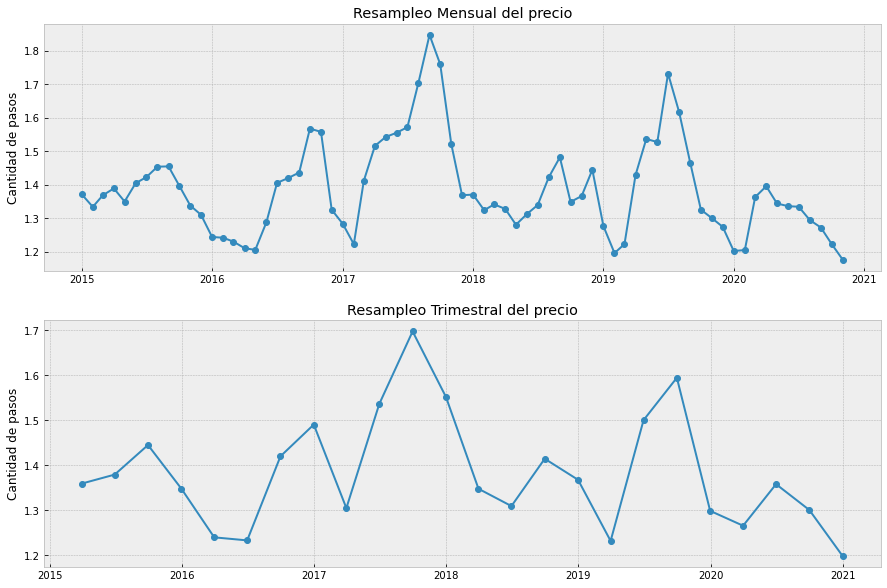

In [59]:
fig = plt.figure(figsize=(15,10))
plt.style.use('bmh')

ax1 = plt.subplot(2,1,1)
ax1 = plt.plot(mensual_filtro.index, mensual_filtro.average_price, marker='o')
plt.title('Resampleo Mensual del precio')
plt.xlabel('')
plt.ylabel('Cantidad de pasos')

ax2 = plt.subplot(2,1,2)
ax2 = plt.plot(trimestral_filtro.index, trimestral_filtro.average_price, marker='o')
plt.title('Resampleo Trimestral del precio')
plt.xlabel('')
plt.ylabel('Cantidad de pasos')

In [60]:
#Realizamos un resampleo de los datos con frecuencia mensual para el volúmen
mensual_filtro_vol = df_estados.resample('MS', on = 'date').sum()
#Realizamos un resampleo de los datos con frecuencia trimestral para el volúmen
trimestral_filtro_vol = df_estados.resample('Q', on = 'date').sum()

Text(0, 0.5, 'Cantidad de pasos')

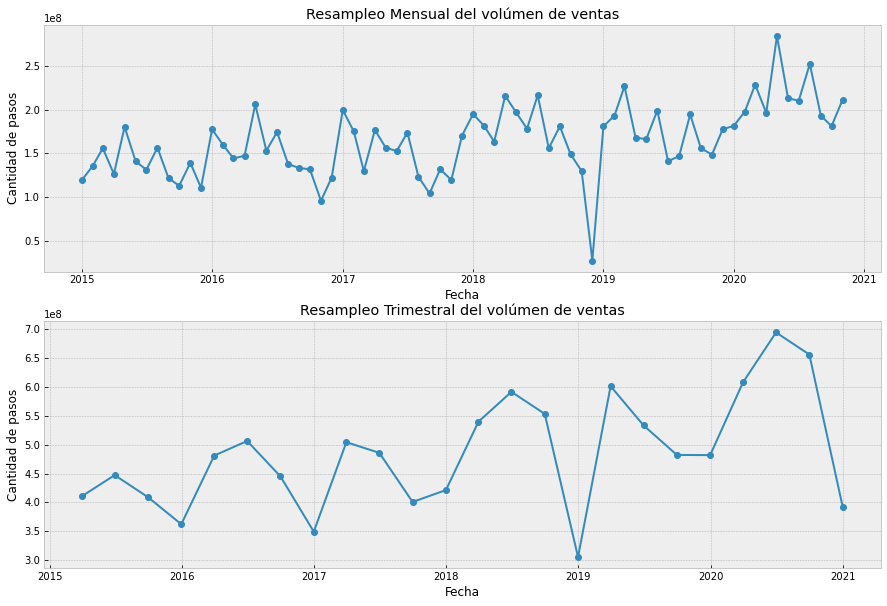

In [61]:
fig = plt.figure(figsize=(15,10))
plt.style.use('bmh')

ax1 = plt.subplot(2,1,1)
ax1 = plt.plot(mensual_filtro_vol.index, mensual_filtro_vol.total_volume, marker='o')
plt.title('Resampleo Mensual del volúmen de ventas')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')

ax2 = plt.subplot(2,1,2)
ax2 = plt.plot(trimestral_filtro_vol.index, trimestral_filtro_vol.total_volume, marker='o')
plt.title('Resampleo Trimestral del volúmen de ventas')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')

## Correlaciones

In [62]:
#Creación de variables dummy para las columnas con valores no numéricos
df_regiones_dummy = pd.get_dummies(df_regiones, columns = ['type','geography'])

In [63]:
df_estados_dummy = pd.get_dummies(df_estados, columns = ['type','geography'])

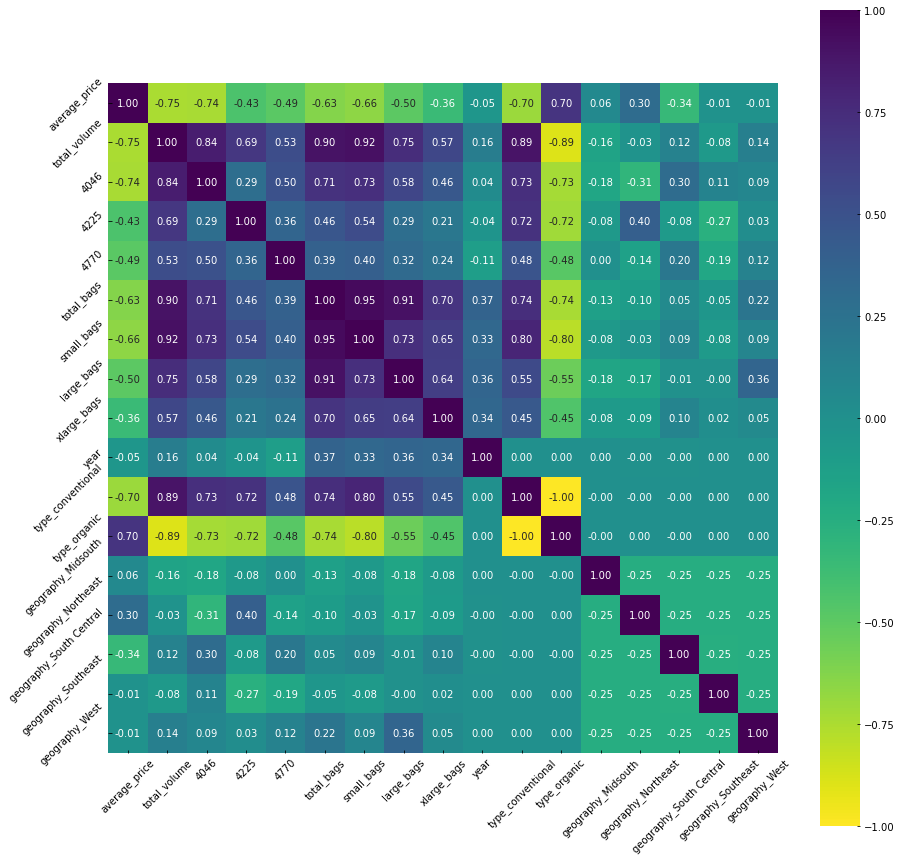

In [64]:
#Gráfica de correalación con Seaborn
df_corr = df_regiones_dummy.corr()
plt.figure(figsize=(15,15))
sns.heatmap(df_corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10}, cmap="viridis_r")
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

Como  podemos apreciar en el gráfico anterior las variables con mayor correlación con el precio son, el volúmen y el código de producto "4046". Las variables de tipo Convencional u orgánico están correlacionadas el 70% una de forma negativa y otra positiva, es decir que el tipo orgánico incrementa el precio mientras que el convencional lo disminuye. Las variables geográficas por región no tienen una correlación importante.

### Modelo de predicción

In [65]:
#Importar MinMaxScaler para el escalado de datos
from sklearn.preprocessing import MinMaxScaler

In [66]:
scaler = MinMaxScaler()

In [67]:
df_estados_dummy[["average_price","total_volume","4046","4225","4770"]]=scaler.fit_transform(
    df_estados_dummy[["average_price","total_volume","4046","4225","4770"]])

In [68]:
df_modelo=df_estados_dummy.copy()

In [69]:
df_modelo_final = df_modelo[['total_volume','average_price','4046','4225','4770','type_conventional','type_organic']]

In [70]:
df_modelo_final

,total_volume,average_price,4046,4225,4770,type_conventional,type_organic
0,0.003602,0.277580,0.000588,0.006903,0.000063,1,0
1,0.000114,0.480427,0.000012,0.000038,0.000000,0,1
2,0.038406,0.199288,0.075989,0.005813,0.000103,1,0
3,0.000332,0.469751,0.000313,0.000229,0.000000,0,1
4,0.069578,0.227758,0.011261,0.134934,0.050324,1,0
...,...,...,...,...,...,...,...
33036,0.000274,0.362989,0.000035,0.000022,0.000000,0,1
33037,0.049658,0.074733,0.048073,0.003731,0.000056,1,0
33038,0.001042,0.181495,0.000021,0.000000,0.000000,0,1
33043,0.072650,0.081851,0.048953,0.019574,0.013267,1,0


### Random Forest

In [100]:
#Importar librerias
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [72]:
#Separación de X y y
X = df_modelo_final.drop(['average_price'], axis=1)
y = df_modelo_final.average_price

In [73]:
X

,total_volume,4046,4225,4770,type_conventional,type_organic
0,0.003602,0.000588,0.006903,0.000063,1,0
1,0.000114,0.000012,0.000038,0.000000,0,1
2,0.038406,0.075989,0.005813,0.000103,1,0
3,0.000332,0.000313,0.000229,0.000000,0,1
4,0.069578,0.011261,0.134934,0.050324,1,0
...,...,...,...,...,...,...
33036,0.000274,0.000035,0.000022,0.000000,0,1
33037,0.049658,0.048073,0.003731,0.000056,1,0
33038,0.001042,0.000021,0.000000,0.000000,0,1
33043,0.072650,0.048953,0.019574,0.013267,1,0


In [74]:
y

0        0.277580
1        0.480427
2        0.199288
3        0.469751
4        0.227758
           ...   
33036    0.362989
33037    0.074733
33038    0.181495
33043    0.081851
33044    0.323843
Name: average_price, Length: 29373, dtype: float64

In [77]:
# Se separa 'x' y 'y' en X_train y y_train para un 70% de entrenamiento y 30% para evaluación.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(20561, 6) (8812, 6) (20561,) (8812,)


In [78]:
#Modelo de regresión
model_rfr = RandomForestRegressor()

In [79]:
# Grilla para Grid Search
param_grid = {"n_estimators":[10,50,100],
              'max_depth': range(2,25),
              "max_features":["sqrt", "log2"],
              "min_samples_split":[2,4,8],
             }

In [80]:
grid_rfr = GridSearchCV(model_rfr, param_grid, n_jobs=-1, cv=5)

In [81]:
# Entrenamos: Random Forest con la grilla definida arriba 
grid_rfr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(2, 25),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 50, 100]})

In [82]:
#Obtener el mejor resultado
grid_rfr.best_score_ , grid_rfr.best_params_

(0.6578744455772536,
 {'max_depth': 21,
  'max_features': 'log2',
  'min_samples_split': 2,
  'n_estimators': 100})

In [83]:
grid_rfr.best_estimator_

RandomForestRegressor(max_depth=21, max_features='log2')

In [84]:
#Definir el modelo con los hiperparámetros obtenidos
rf = RandomForestRegressor(n_estimators= 100, max_depth=21, max_features='log2', min_samples_split=2,)

In [85]:
#Entrenar modelo
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=21, max_features='log2')

In [86]:
#Obtener la importancia de las variables
rf.feature_importances_

array([0.24692242, 0.23208067, 0.1892395 , 0.09847835, 0.12455075,
       0.1087283 ])

C:\Users\amorg\anaconda3\envs\ciencia-datos-cf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


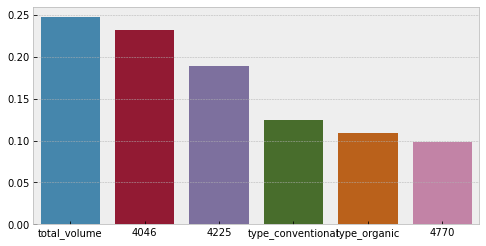

In [87]:
importances = rf.feature_importances_
columns = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (8,4))
sns.barplot(columns[indices], importances[indices])
plt.show()

In [88]:
#Predecir
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [89]:
#evaluar modelo con r2
print(metrics.r2_score(y_train, y_train_pred))
print(metrics.r2_score(y_test, y_test_pred))

0.937121326422565
0.6652302736172591
